## **Dataset**

Features:<br>

`RowNumber` - the index of the row in the data <br>
`CustomerId` - unique customer identifier <br>
`Surname` - surname <br>
`CreditScore` - credit rating <br>
`Geography` - country of residence <br>
`Gender` - gender <br>
`Age` - age <br>
`Tenure` - how many years a person has been a client of the bank <br>
`Balance` - account balance <br>
`NumOfProducts` - the number of bank products used by the client <br>
`HasCrCard` - availability of a credit card <br>
`IsActiveMember` - client activity <br>
`EstimatedSalary` - estimated salary <br>

Target column: <br>

`Exited` - the fact of the client's departure 

**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
plt.style.use("fivethirtyeight")
%matplotlib inline

**Read dataset**

In [2]:
banking = pd.read_csv('./data/bank_dataset.csv')
banking.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EXPLORATORY DATA ANALYSIS**

Explore the dataset

In [3]:
banking.shape

(10000, 14)

In [4]:
banking.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Checking if there is any null values

In [5]:
banking.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Checking column type

In [6]:
banking.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
continous   = ['CeditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

Drop the unnecessary column (`RowNumber`, `CustomerId`, `Surname`)

In [8]:
banking.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace=True)

In [9]:
banking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Exploratory Data Analysis**

In [10]:
#  plot the relationship between geography, gender, age, tenure ..... with Exited

banking.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


These graphs below are plotted to observe the relationship between the categorical variables to the target variable.

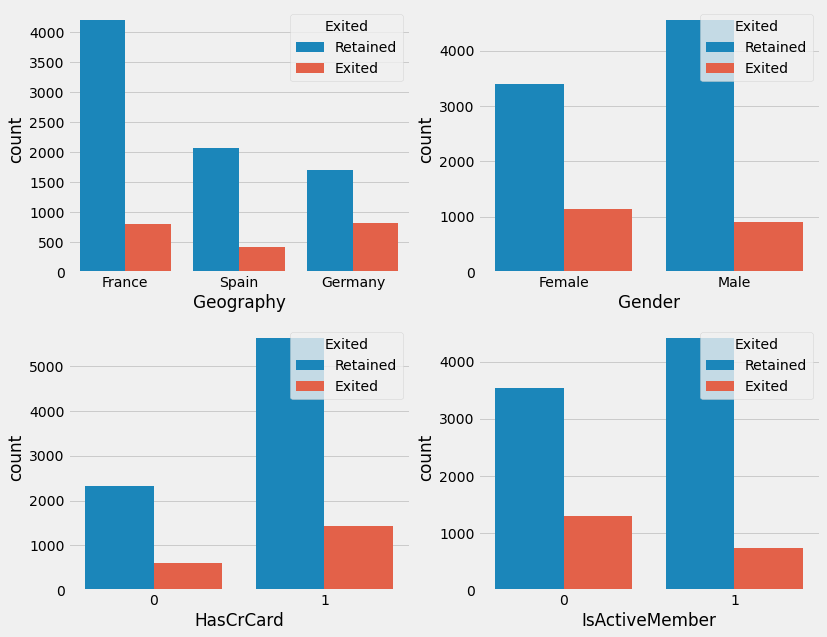

In [157]:

fig, axarr = plt.subplots(2, 2, figsize=(20, 15));

# Geography
geography_plot = sns.countplot(x='Geography', hue = 'Exited',data = banking, ax=axarr[0][0])
geography_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Gender
gender_plot = sns.countplot(x='Gender', hue = 'Exited',data = banking, ax=axarr[0][1])
gender_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Has Credit Card
cc_plot = sns.countplot(x='HasCrCard', hue = 'Exited',data = banking, ax=axarr[1][0])
cc_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Active Customer
active_plot = sns.countplot(x='IsActiveMember', hue = 'Exited',data = banking, ax=axarr[1][1])
active_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);

# Estimated Salary
# salary_plot = sns.histplot(x='EstimatedSalary',hue = 'Exited', data = banking, ax=axarr[2][0])
# salary_plot.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);
# banking.plot(kind='hist', x='EstimatedSalary', y='Exited', ax=axarr[2][0]);

plt.show()


### **From the observation, we can conclude certain criteria that most customers comes from France and most of them are male. Most of the customer that Exited has a credit card but not an active member of the bank.** 

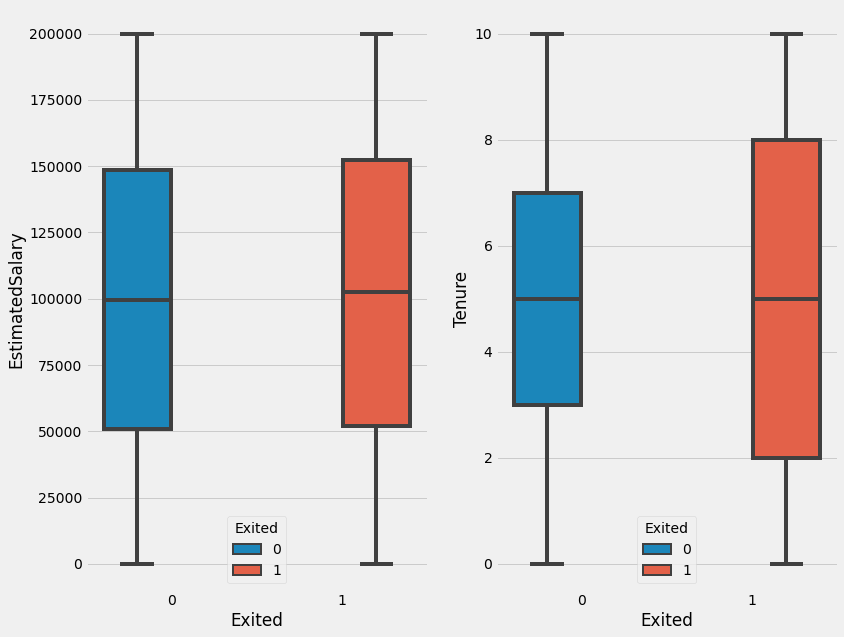

In [158]:

fig, axarr = plt.subplots(1, 2, figsize=(20, 12));

# Estimated Salary
salary_plot = sns.boxplot(x= 'Exited' ,y='EstimatedSalary', hue = 'Exited',data = banking, ax=axarr[0])
salary_plot

# Tenure
tenure_plot = sns.boxplot(x= 'Exited', y='Tenure', hue = 'Exited',data = banking, ax=axarr[1])
tenure_plot

plt.show()


### This boxplots help us understand that both EstimatedSalary and Tenure shows a normal distribution graph. The median for EstimatedSalary is higher for Customer that Exited compared to customer that retained with the bank. Furthermore Exited customer have much larger spread in Tenure compared to the retained customer

Here we will look for each exited customers with different variable to understand further

In [13]:
banking.Exited.value_counts()

# 0 = Retained; 1 = Exited

0    7963
1    2037
Name: Exited, dtype: int64

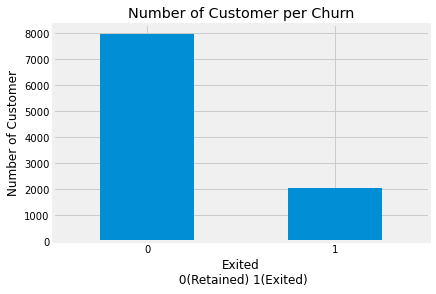

In [14]:
count_Exited = banking.Exited.value_counts()
count_Exited.plot(kind='bar');
plt.xlabel('Exited\n 0(Retained) 1(Exited)');
plt.ylabel('Number of Customer');
plt.title('Number of Customer per Churn');
plt.xticks(rotation=0);
plt.show()


This graph simply shows the number of customers that has Exited compared to Retained

<AxesSubplot:xlabel='Exited', ylabel='Age'>

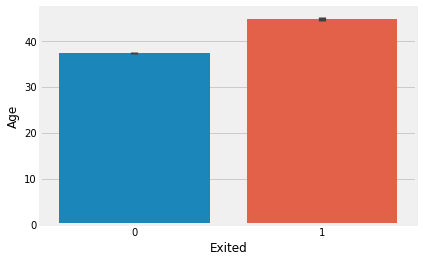

In [15]:
# sns.lmplot(x='Age', y='Exited', data=banking, aspect=1.5, scatter_kws={'alpha':0.2});

sns.barplot(data=banking, x='Exited', y='Age')

In [169]:
banking["AgeGroup"] = pd.qcut(banking['Age'], 5)
banking.groupby("AgeGroup")["Exited"].value_counts()

AgeGroup        Exited
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: Exited, dtype: int64

From this analysis we able to find out that most exited customers are older customer.

In [148]:
banking.groupby('Exited').agg(["min","mean","max"])

CreditScore                  Age                Tenure                \
               min        mean  max min       mean max    min      mean max   
Exited                                                                        
0              405  651.853196  850  18  37.408389  92      0  5.033279  10   
1              350  645.351497  850  18  44.837997  84      0  4.932744  10   

       Balance  ... NumOfProducts HasCrCard               IsActiveMember  \
           min  ...           max       min      mean max            min   
Exited          ...                                                        
0          0.0  ...             3         0  0.707146   1              0   
1          0.0  ...             4         0  0.699067   1              0   

                     EstimatedSalary                            
            mean max             min           mean        max  
Exited                                                          
0       0.554565   1           90.07   99738.391772  199992.48  
1       0.360825   1           11.58  101465.677531  199808.10  

[2 rows x 24 columns]

In [149]:
banking.groupby(["IsActiveMember","HasCrCard"]).agg({"Exited":"count"})

Exited
IsActiveMember HasCrCard        
0              0            1401
               1            3448
1              0            1544
               1            3607

This analysis shows that customer that is active and have credit card that exited are almost the same with customer that is not an active member and has a credit card. This shows it is not a strong correlation between those variables

In [177]:
banking.groupby("Tenure")["Exited"].value_counts()

Tenure  Exited
0       0         318
        1          95
1       0         803
        1         232
2       0         847
        1         201
3       0         796
        1         213
4       0         786
        1         203
5       0         803
        1         209
6       0         771
        1         196
7       0         851
        1         177
8       0         828
        1         197
9       0         771
        1         213
10      0         389
        1         101
Name: Exited, dtype: int64

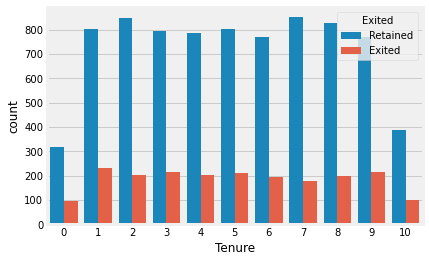

In [18]:
#fig, axarr = plt.subplots(1, 2, figsize=(15, 10));
# Tenure
fig = sns.countplot(x='Tenure', hue = 'Exited',data = banking);
#fig = sns.countplot(x='CreditScore', hue = 'Exited',data = banking, ax=axarr[1]);
fig.legend(title='Exited', loc='upper right', labels=['Retained', 'Exited']);
plt.show()

This analysis able to show that there is a spread of exited customer in the middle of tenure and the highest would be the first year

In [151]:
banking.groupby('Geography').Gender.value_counts().unstack()

           Exited
Geography        
France       5014
Germany      2509
Spain        2477
        Exited
Gender        
Female    4543
Male      5457


##### Credit Score Range <br>
300-579: Poor <br>
580-669: Fair <br>
670-739: Good <br>
740-799: Very good <br>
800-850: Excellent <br>

In [147]:
meanAge_byGeo = banking.groupby('Geography')['Age'].mean()
meanCS_byGeo  = banking.groupby('Geography')['CreditScore'].mean()
meanBal_byGeo = banking.groupby('Geography')['Balance'].mean()
print(meanAge_byGeo)
print(meanCS_byGeo)
print(meanBal_byGeo)

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64
Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64
Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64


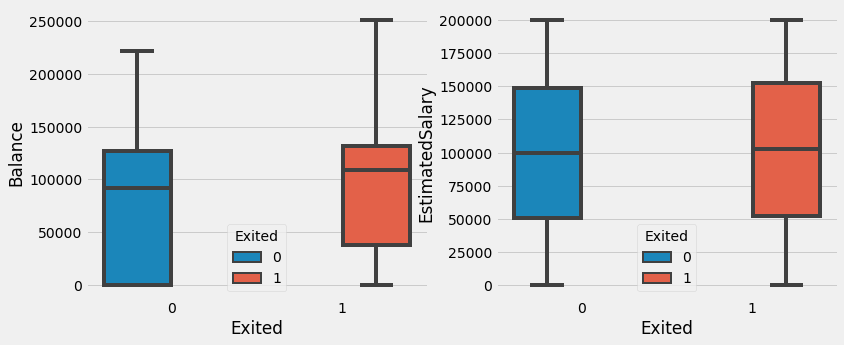

In [152]:
fig, arr = plt.subplots(1,2,figsize=(12,5))
fig = sns.boxplot(y = 'Balance', x = 'Exited', 
                    hue = 'Exited', data=banking,
                    ax = arr[0]).legend(title='Exited', loc='lower center')
fig = sns.boxplot(y = 'EstimatedSalary', x = 'Exited', 
                    hue = 'Exited', data=banking,
                    ax = arr[1]).legend(title='Exited', loc='lower center')
plt.show()

Graph on left shows that Balance for exited customer is larger than for Retained customer. <br>
Graph on the right shows that the estimated salary for both Retained and Exited is normally distributed with higher median on the Exited customer

Check the relationship between the data

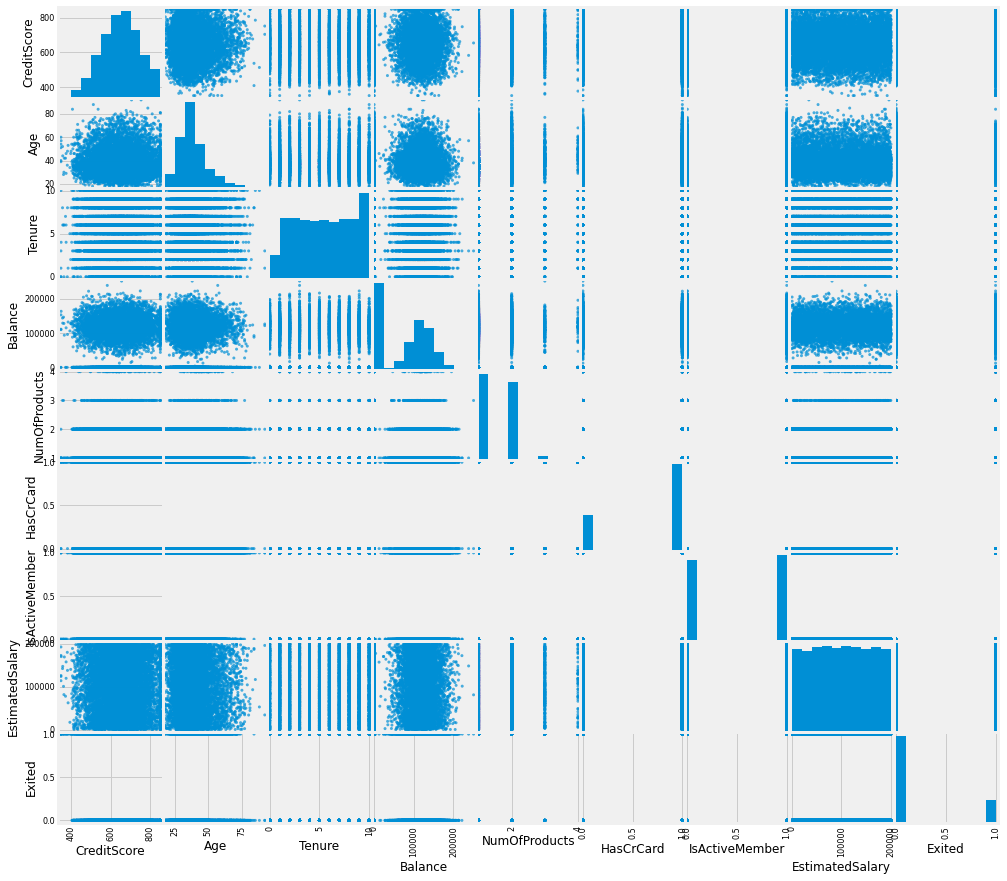

In [19]:
feature_cols = banking.columns.tolist()
grr = pd.plotting.scatter_matrix(banking[feature_cols], figsize=(15, 15), alpha=0.7)

In [20]:
banking.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


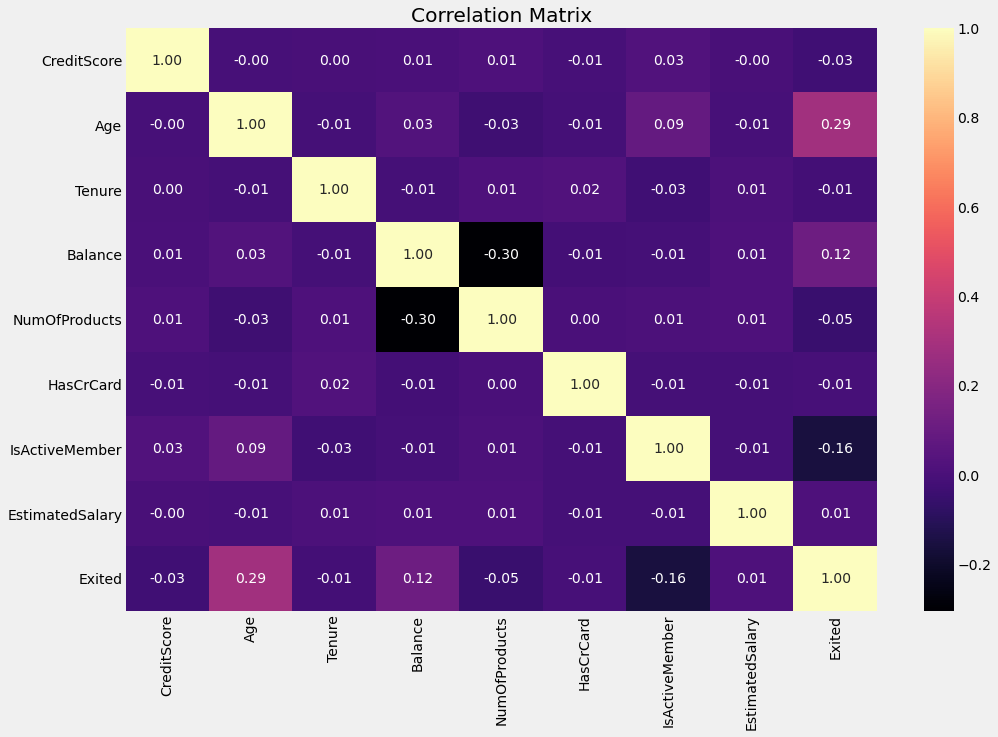

In [185]:
fig, arr = plt.subplots(figsize=(15,10))
sns.heatmap(banking.corr(), annot=True, fmt=".2f", ax=arr, cmap = "magma")
arr.set_title("Correlation Matrix")
plt.show();

# **Modeling**

In [22]:
banking_dummy = pd.get_dummies(banking)
banking_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [23]:
banking_dummy.drop(["Geography_France","Gender_Female"],axis=1, inplace=True)

In [24]:
banking_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
from collections import Counter
from imblearn.over_sampling import SMOTE
# Calculate class distribution for target variable
print(Counter(banking["Exited"]))

Counter({0: 7963, 1: 2037})


Since the dataset is unstable, an oversample will be implemented

In [26]:
# transform the dataset
x = banking_dummy.columns.difference(["Exited"])
oversample = SMOTE()
x_new, y_new = oversample.fit_resample(banking_dummy[x],banking_dummy["Exited"])

# summarize the new class distribution
counter = Counter(y_new)
print(counter)

Counter({1: 7963, 0: 7963})


In [27]:
# Merge independent variables and dependent variable in one dataset
x_new = pd.DataFrame(data=x_new,columns=x )
y_new = pd.DataFrame(data=y_new,columns=["Exited"])
banking_model = pd.concat([x_new, y_new], axis=1)
banking_model

,Age,Balance,CreditScore,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Exited
0,42,0.000000,619,101348.880000,0,0,0,1,1,1,2,1
1,41,83807.860000,608,112542.580000,0,0,1,0,1,1,1,0
2,42,159660.800000,502,113931.570000,0,0,0,1,0,3,8,1
3,39,0.000000,699,93826.630000,0,0,0,0,0,2,1,0
4,43,125510.820000,850,79084.100000,0,0,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,57,138071.204772,684,40926.464294,0,0,0,1,0,1,5,1
15922,47,105974.246461,642,91991.860711,0,1,0,1,0,1,7,1
15923,41,104568.273741,640,22465.258204,0,0,0,0,0,1,1,1
15924,66,110218.540626,709,141868.177538,0,0,0,0,0,1,2,1


In [28]:
import warnings
from pylab import rcParams
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Import performance measure to evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
x = banking_model.drop(['Exited'], axis = 1)
y = banking_model['Exited']

In [30]:
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state=12)

print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

11944
3982
11944
3982


In [31]:
LR = LogisticRegression().fit(train_x,train_y)
predict = LR.predict(test_x)

confusion_matrix = confusion_matrix(test_y, predict)
print(confusion_matrix)

[[1299  642]
 [ 634 1407]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1941
           1       0.69      0.69      0.69      2041

    accuracy                           0.68      3982
   macro avg       0.68      0.68      0.68      3982
weighted avg       0.68      0.68      0.68      3982



In [33]:
print("Accuracy = " ,accuracy_score(test_y,predict))
print("Precision = " ,precision_score(test_y,predict))
print("Recall = " ,recall_score(test_y,predict))
print("F1 Score = " ,f1_score(test_y,predict))

Accuracy =  0.6795580110497238
Precision =  0.6866764275256223
Recall =  0.6893679568838804
F1 Score =  0.6880195599022005


In [34]:
import statsmodels.api as sm
# Built regression model
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     638.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:31:17   Log-Likelihood:                -5903.1
No. Observations:               11944   AIC:                         1.183e+04
Df Residuals:                   11932   BIC:                         1.192e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3869      0.03

Variance low 

In [35]:
import statsmodels.formula.api as smf

model_odds = pd.DataFrame(np.exp(lm.params), columns= ['OR'])
model_odds['z-value']= lm.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(lm.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
const,1.472368,1.603794e-29,1.376906,1.574449
Age,1.014706,0.000000e+00,1.013974,1.015438
Balance,1.000001,5.432646e-15,1.000000,1.000001
CreditScore,0.999889,5.135510e-03,0.999812,0.999967
EstimatedSalary,1.000000,7.839380e-01,1.000000,1.000000
Gender_Male,0.801689,3.309662e-182,0.789919,0.813635
Geography_Germany,1.024956,7.754577e-03,1.006527,1.043722
Geography_Spain,0.855759,3.922699e-54,0.839141,0.872705
HasCrCard,0.898253,2.043502e-45,0.885049,0.911654
IsActiveMember,0.736007,0.000000e+00,0.724989,0.747193


|Variables| Odds Ratio| Explanation|
|---|---| --- |
|Age | 1.015|For every one unit increases with age, the odd to be exited increases by 2%|
|Balance| 1.000|For every one unit increases with balance, the odd to be exited is 0%|
|Credit Score | 0.999|For every one unit increases with credit score, the odd to be exited decreases by 1%|
|Estimated Salary | 1.000| For every one unit increases with estimated salary, the odd to be exited is 0%|  
|Gender_Male | 0.799| Male customer more likely to be exited than female| 
|Geography_Germany | 1.023|Customer from France more likely to be exited than customer from Germany|  
|Geography_Spain | 0.851| Customer from Spain more likely to be exited than customer from France|    
|HasCrCard | 0.900| Customer without credit card more likely to be exited than customer with credit card|  
|IsActiveMember | 0.736| Non-active customer more likely to be exited than active customer|  
|NumOfProducts | 0.918| For every one unit increases with number of products, the odd to be exited decreases by 8%| 
|Tenure | 0.992| For every one unit increases with tenure, the odd to be exited decreases by 1%| 

In [36]:
importance = LR.coef_[0]

              feature  importance
0                 Age    1.066182
5   Geography_Germany    1.000311
1             Balance    1.000004
3     EstimatedSalary    0.999999
6     Geography_Spain    0.998663
7           HasCrCard    0.998476
9       NumOfProducts    0.998232
4         Gender_Male    0.997129
8      IsActiveMember    0.996762
10             Tenure    0.996441
2         CreditScore    0.995700


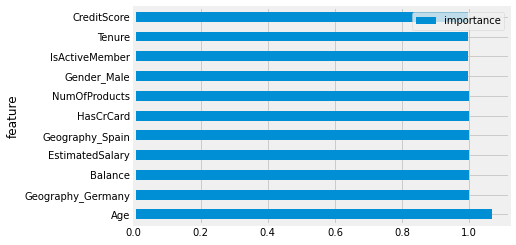

In [37]:
# Calculate the score importance
import math
X = x.columns.tolist()

feature_importance = pd.DataFrame(X, columns = ["feature"])
feature_importance["importance"] = pow(math.e, importance)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [39]:
# Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
DT = DecisionTreeClassifier()

# Train Decision Tree Classifer
DT = DT.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = DT.predict(test_x)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1941
           1       0.80      0.81      0.80      2041

    accuracy                           0.80      3982
   macro avg       0.80      0.80      0.80      3982
weighted avg       0.80      0.80      0.80      3982



In [40]:
# Evaluate performance of Decision Tree
print("Accuracy = " ,accuracy_score(test_y,y_pred))
print("Precision = " ,precision_score(test_y,y_pred))
print("Recall = " ,recall_score(test_y,y_pred))
print("F1 Score = " ,f1_score(test_y,y_pred))

Accuracy =  0.7990959316926167
Precision =  0.8019464720194647
Recall =  0.8074473297403234
F1 Score =  0.8046875


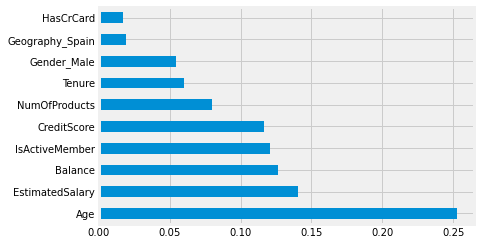

In [41]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(DT.feature_importances_, index=train_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x,train_y)
    pred = knn.predict(test_x)
    score = float(sum(pred == test_y)) / len(test_y)
    scores.append([k, score])

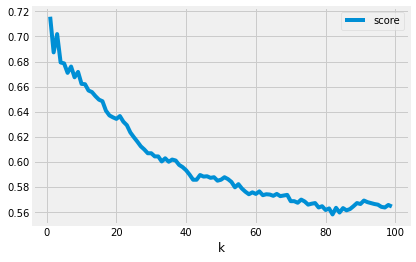

In [46]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [47]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with data.
knn.fit(train_x, train_y)

# Store the predicted response values.
y_pred_class = knn.predict(test_x)

In [48]:
print(classification_report(test_y, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1941
           1       0.68      0.78      0.73      2041

    accuracy                           0.70      3982
   macro avg       0.71      0.70      0.70      3982
weighted avg       0.71      0.70      0.70      3982



In [50]:
# Evaluate performance of KNeighbors 
print("Accuracy = " ,accuracy_score(test_y,y_pred_class))
print("Precision = " ,precision_score(test_y,y_pred_class))
print("Recall = " ,recall_score(test_y,y_pred_class))
print("F1 Score = " ,f1_score(test_y,y_pred_class))

Accuracy =  0.7019085886489201
Precision =  0.6837349397590361
Recall =  0.7785399314061734
F1 Score =  0.7280641466208476
